In [15]:
# started here https://medium.com/@tomgrek/building-your-first-neural-net-from-scratch-with-pytorch-56b0e9c84d54

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
import torch.optim as optim
import numpy as np

%matplotlib inline

In [107]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,1024)
        self.fc2 = nn.Linear(1024,1)
    def forward(self, x):
        x = F.relu(self.fc2(F.relu(self.fc1(x))))
        return x
    
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)

In [79]:
class LinearNet(nn.Module):
    def __init__(self):
        super(LinearNet, self).__init__()
        self.fc1 = nn.Linear(1,1)
        self.fc2 = nn.Linear(1,1)
    def forward(self, x):
        x = self.fc1(x)
        return x
    
net = LinearNet()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

In [ ]:
class SkipNet(nn.Module):
    def __init__(self):
        super(SkipNet, self).__init__()
        self.fc1 = nn.Linear(1,1024)
        self.fc2 = nn.Linear(1024,1)
        self.linear_gain = nn.Linear(1,1)
    def forward(self, x):
        x = F.relu(self.fc2(F.relu(self.fc1(x)))) + self.linear_gain(x) 
        return x
    
skipnet = SkipNet()
skipoptimizer = optim.SGD(skipnet.parameters(), lr=0.01, momentum=0.5)

In [76]:
def criterion(out, label):
    return (label - out)**2 + torch.abs(net.fc1.weight.sum())/1024

tensor(24.3263, grad_fn=<SumBackward0>)

In [96]:
data = [(1,3), (2,6), (3,9), (4,12), (5,15), (6,18)]
loss_hist = []
weight_hist1 = []
weight_hist2 = []

In [108]:
weight_hist1.append(net.fc1.weight)
for epoch in range(100):
    for i, data2 in enumerate(data):
        X, Y = iter(data2)
        #X, Y = Variable(torch.FloatTensor([X]), requires_grad=True).cuda(), Variable(torch.FloatTensor([Y]), requires_grad=False).cuda()
        X, Y = Variable(torch.FloatTensor([X]), requires_grad=True), Variable(torch.FloatTensor([Y]), requires_grad=False)

        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        
        loss_hist.append(loss.data[0])
        weight_hist1.append(net.fc1.weight)
        #weight_hist2.append(net.fc2.weight)
        #if (i % 10 == 0):
            #print("Epoch {} - loss: {}".format(epoch, loss.data[0]))

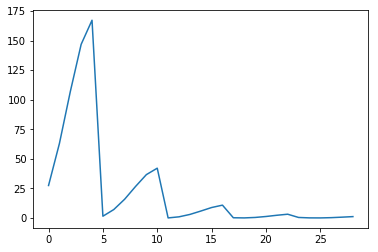

In [109]:
%matplotlib inline
plt.plot(loss_hist[1:30])

In [77]:
# for the skip network
skip_loss_hist = []
skip_weight_hist1 = []
skip_weight_hist2 = []

for epoch in range(100):
    for i, data2 in enumerate(data):
        X, Y = iter(data2)
        #X, Y = Variable(torch.FloatTensor([X]), requires_grad=True).cuda(), Variable(torch.FloatTensor([Y]), requires_grad=False).cuda()
        X, Y = Variable(torch.FloatTensor([X]), requires_grad=True), Variable(torch.FloatTensor([Y]), requires_grad=False)

        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        
        loss_hist.append(loss.data[0])
        weight_hist1.append(net.fc1.weight)
        weight_hist2.append(net.fc2.weight)
        #if (i % 10 == 0):
            #print("Epoch {} - loss: {}".format(epoch, loss.data[0]))


In [ ]:
plt.plot(skip_loss_hist)

In [106]:
weight_hist1[0]


Parameter containing:
tensor([[ 0.0721],
        [ 0.2712],
        [-0.7783],
        ...,
        [-0.6290],
        [ 0.0568],
        [ 0.5849]], requires_grad=True)

Parameter containing:
tensor([[ 0.2038],
        [ 0.9240],
        [-0.1357],
        ...,
        [ 0.2966],
        [-0.9909],
        [-0.3465]], requires_grad=True)

In [35]:
loss_hist[1:100]

[tensor(24582.4102),
 tensor(24617.1680),
 tensor(24664.8066),
 tensor(24727.8887),
 tensor(24807.6855),
 tensor(24472.8496),
 tensor(24479.6855),
 tensor(24504.3672),
 tensor(24546.9688),
 tensor(24607.5312),
 tensor(24686.0664),
 tensor(24350.5977),
 tensor(24357.1211),
 tensor(24381.6426),
 tensor(24424.1680),
 tensor(24484.6855),
 tensor(24563.2051),
 tensor(24227.7285),
 tensor(24234.2461),
 tensor(24258.7637),
 tensor(24301.2871),
 tensor(24361.8047),
 tensor(24440.3262),
 tensor(24104.8477),
 tensor(24111.3633),
 tensor(24135.8848),
 tensor(24178.4062),
 tensor(24238.9238),
 tensor(24317.4414),
 tensor(23981.9609),
 tensor(23988.4844),
 tensor(24013.),
 tensor(24055.5176),
 tensor(24116.0410),
 tensor(24194.5586),
 tensor(23859.0762),
 tensor(23865.5996),
 tensor(23890.1172),
 tensor(23932.6367),
 tensor(23993.1582),
 tensor(24071.6758),
 tensor(23736.1992),
 tensor(23742.7129),
 tensor(23767.2363),
 tensor(23809.7578),
 tensor(23870.2715),
 tensor(23948.7969),
 tensor(23613.310

In [46]:
net

Net(
  (fc1): Linear(in_features=1, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1, bias=True)
)